In [16]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras import optimizers
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [17]:
np.random.seed(1671)  # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits

n_hidden1 = 500
n_hidden2 = 300
n_hidden3 = 100
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [18]:
# data: shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
input_size = 784
x_train = x_train.reshape(60000, input_size)
x_test = x_test.reshape(10000, input_size)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize 
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

(60000, 'train samples')
(10000, 'test samples')


In [19]:
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(n_hidden1, input_shape=(input_size,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(n_hidden2))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(n_hidden3))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

#OPTIMIZER = optimizers.SGD(lr=0.01)
OPTIMIZER = optimizers.SGD(lr=0.01, momentum=0.9,nesterov=True)

#OPTIMIZER = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#OPTIMIZER=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#OPTIMIZER=optimizers.Adagrad(lr=0.05, epsilon=None, decay=0.0)
#OPTIMIZER=optimizers.Adadelta(rho=0.95, epsilon=None, decay=0.0)
#OPTIMIZER=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#OPTIMIZER=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
#OPTIMIZER=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \                          verbose=1, mode='auto')
callbacks_list = [earlystop]

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,callbacks=callbacks_list,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


score = model.evaluate(x_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_9 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               150300    
_________________________________________________________________
activation_10 (Activation)   (None, 300)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
__________

In [20]:
train_sgd=history.history['acc']
val_sgd=history.history['val_acc']

sgd_err_train=[]
sgd_err_val=[]
for t1,t2 in zip(train_sgd,val_sgd):
    sgd_err_train.append(1-t1)
    sgd_err_val.append(1-t2)
    
    
# train_momentum=history.history['acc']
# val_momentum=history.history['val_acc']
# momentum_err_train=[]
# momentum_err_val=[]
# for t1,t2 in zip(train_momentum,val_momentum):
#     momentum_err_train.append(1-t1)
#     momentum_err_val.append(1-t2)

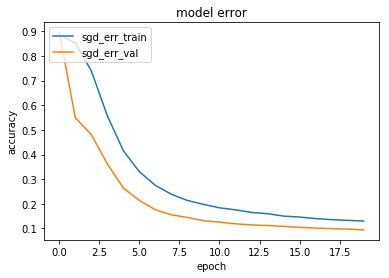

In [21]:
# plt.plot(train_RMSprop)
# plt.plot(train_RMSprop)

plt.plot(sgd_err_train)
plt.plot(sgd_err_val)



plt.title('model error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['sgd_err_train','sgd_err_val'], loc='upper left')

plt.show()